# Stochastic block model

In [3]:
import numpy as np
import networkx as nx
import src.SBM as SBM
import src.CommunitiesGraph as CG
from importlib import reload
from scipy.sparse.linalg import eigs
from scipy.sparse import diags, eye
from sklearn.cluster import KMeans

In [17]:
reload(SBM)

# Initialize SBM
n = 100
q = 2
a = np.array([0.5,0.5])
P = np.array([[0.8,0.1],[0.1,0.8]])
sbm = SBM.SBM(n,q,a,P)


G = nx.DiGraph(sbm.get_adjacency())


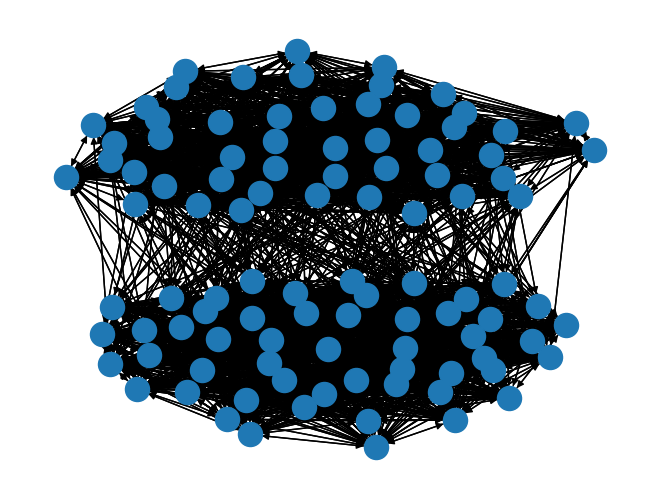

In [18]:
# plot the graph
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()


**Communities Graph**

In [50]:
# Import dataset
n_community=3
community_frequency = np.ones(n_community) * (1/n_community)
p=1
q=0
n=50
dataset = CG.BaseCommunitiesGraph(n_community, p, q, n, community_frequency)

In [51]:
dataset.print_properties()

Communities dataset
Number of nodes: 50
Number of edges: 812
Number of features per node: 1


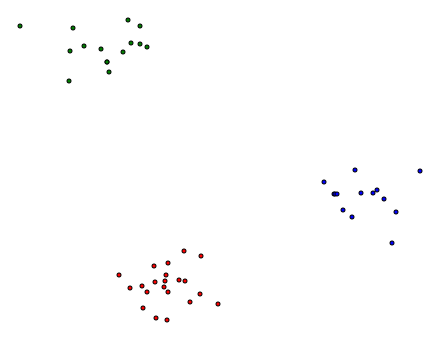

In [52]:
dataset.display()

In [53]:
reload(SBM)

# Initialize SBM
n = 0
q = 0
a = np.array([0])
P = np.array([[0]])
sbm = SBM.SBM(n,q,a,P)

K_up = 3

sbm.fit(dataset.adjacency, K_up, inference_method='variational_EM')

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


0
1
2
3
4
5
0
1
0
1
2
3


c:\Users\Usuario\Documents\Documents\MVA\PGM\PGM\src\SBM.py:152: RuntimeWarning: invalid value encountered in scalar divide
  tau[i,q] = tau[i,q] * (1 - c) / np.sum(tau[i,:])


4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277
278
27

In [ ]:
print(dataset.labels)

[1 1 1 1 0 2 0 2 0 1 1 2 2 2 0 1 1 0 0 0 2 0 0 1 1 0 0 2 1 2 1 2 2 1 2 1 1
 0 1 0 1 1 1 2 0 1 2 2 1 2]


In [49]:
print(np.argmax(sbm.Z, axis=1))


[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [40]:
# print accuracy
from sklearn.metrics import accuracy_score
print(accuracy_score(dataset.labels, 1-np.argmax(sbm.Z, axis=1)))


0.42


In [41]:
G = nx.Graph(sbm.X)

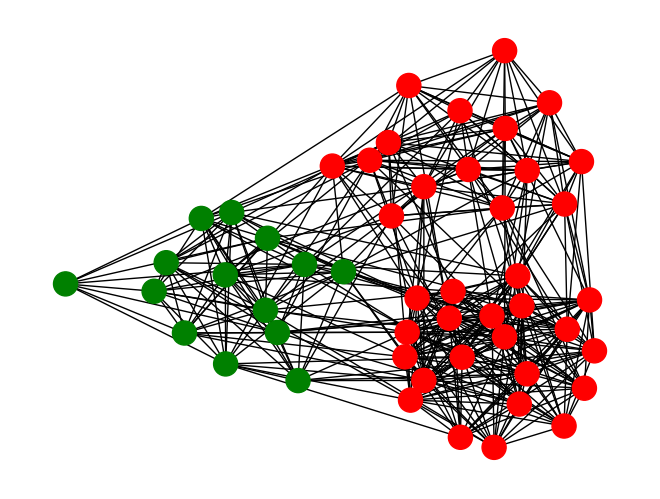

In [42]:
colors = ['red' if l != dataset.labels[i] else 'green' for i,l in enumerate(np.argmax(sbm.Z, axis=1))]


# plot the graph with colors
import matplotlib.pyplot as plt
nx.draw(G, node_color=colors)
plt.show()


In [104]:
def spectral_clustering(A, k):
    ''' Spectral clustering algorithm '''

    # Identity matrix
    I = eye(A.shape[0])

    # Inverse of diagonal degree matrix
    D_inv = diags(1 / A.sum(axis=0))

    # Random walk normalized Laplacian matrix
    L_rw = I - (D_inv @ A)          

    _, eig_vecs = eigs(L_rw, k, which='SR')
    eig_vecs = eig_vecs.real

    kmeans = KMeans(n_clusters=k).fit(eig_vecs)

    return kmeans.labels_

In [105]:
# spectral clustering
spectral_labels = spectral_clustering(dataset.adjacency, 3)

c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\Usuario\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1436: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [106]:
print("Spectral clustering accuracy: ", sbm.accuracy(spectral_labels))
print(spectral_labels)
print(np.argmax(sbm.get_clusters(), axis=1))

Spectral clustering accuracy:  1.0
[0 0 0 0 1 2 1 2 1 0 0 2 2 2 1 0 0 1 1 1 2 1 1 0 0 1 1 2 0 2 0 2 2 0 2 0 0
 1 0 1 0 0 0 2 1 0 2 2 0 2 0 0 0 2 1 2 1 0 2 1 0 2 1 1 0 0 2 1 0 0 2 1 2 1
 1 0 1 2 0 0 2 1 1 1 1 1 2 1 1 2 1 2 0 1 2 1 0 0 1 2]
[0 0 0 0 1 2 1 2 1 0 0 2 2 2 1 0 0 1 1 1 2 1 1 0 0 1 1 2 0 2 0 2 2 0 2 0 0
 1 0 1 0 0 0 2 1 0 2 2 0 2 0 0 0 2 1 2 1 0 2 1 0 2 1 1 0 0 2 1 0 0 2 1 2 1
 1 0 1 2 0 0 2 1 1 1 1 1 2 1 1 2 1 2 0 1 2 1 0 0 1 2]


In [107]:
sbm.generate(100)

In [108]:
G = nx.DiGraph(sbm.get_adjacency())

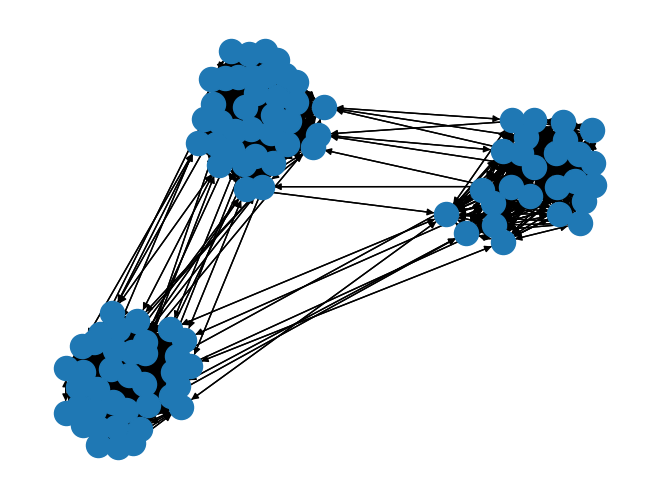

In [109]:

# plot the graph
import matplotlib.pyplot as plt
nx.draw(G)
plt.show()
